In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('SMSSpamCollection', sep='\t', names=['label','text'])

In [3]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<Axes: xlabel='count', ylabel='label'>

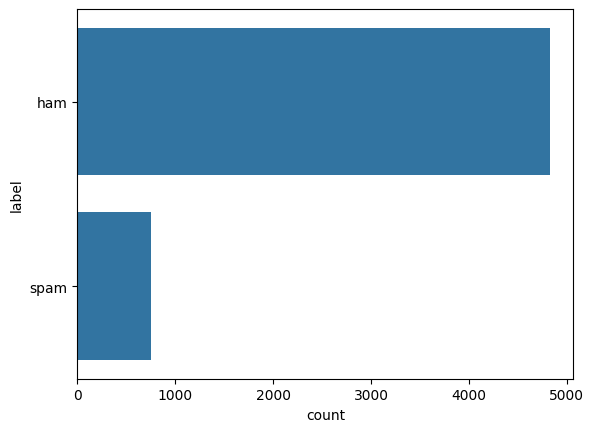

In [4]:
sns.countplot(df['label'])

In [5]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

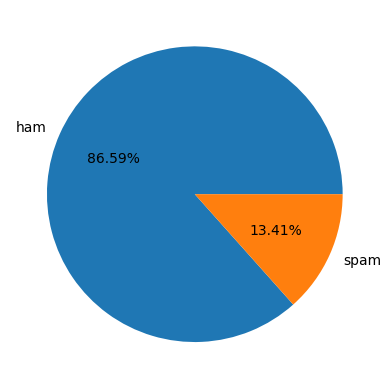

In [6]:
plt.pie(df['label'].value_counts(), 
        labels=df['label'].value_counts().index,autopct='%2.2f%%');

In [7]:
# input variable
x = df['text']

# output variable
y = df['label']

In [8]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import stopwords

In [9]:
swords = stopwords.words('english')
ps = PorterStemmer()
wnl = WordNetLemmatizer()

In [58]:
def clean_text(sent):
    tokens1 = word_tokenize(sent)
    tokens2 = [token for token in tokens1 if token.isalpha()]
    tokens3 = [ps.stem(token.lower()) for token in tokens2 
               if token.lower() not in swords]
    return tokens3

In [59]:
sent = "Hello friends! How are you? Welcome to Python programming."

In [60]:
clean_text(sent)

['hello', 'friend', 'welcom', 'python', 'program']

In [61]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [62]:
ham = x[y=='ham']
spam = x[y=='spam']

In [63]:
ham.shape

(4825,)

In [64]:
spam.shape

(747,)

In [65]:
ham

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
6       Even my brother is not like to speak with me. ...
                              ...                        
5565                                         Huh y lei...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 4825, dtype: object

In [66]:
spam_messages = spam.sum() 
ham_messages = ham.sum()

In [68]:
len(spam_messages)

103587

In [69]:
len(ham_messages)

344903

In [70]:
from wordcloud import WordCloud

In [76]:
wc_spam = WordCloud(background_color='white', 
                    max_words=50).generate(spam_messages)

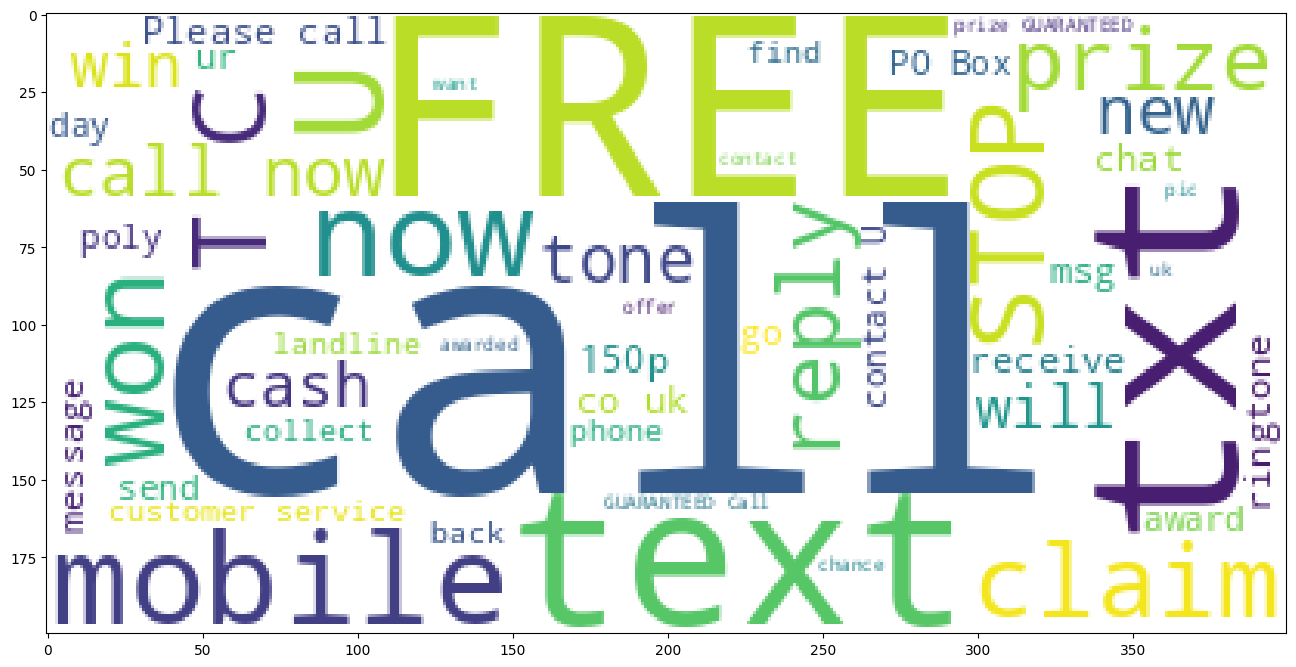

In [77]:
plt.figure(figsize=(16,9))
plt.imshow(wc_spam)

In [78]:
wc_ham = WordCloud(background_color='white', 
                    max_words=50).generate(ham_messages)

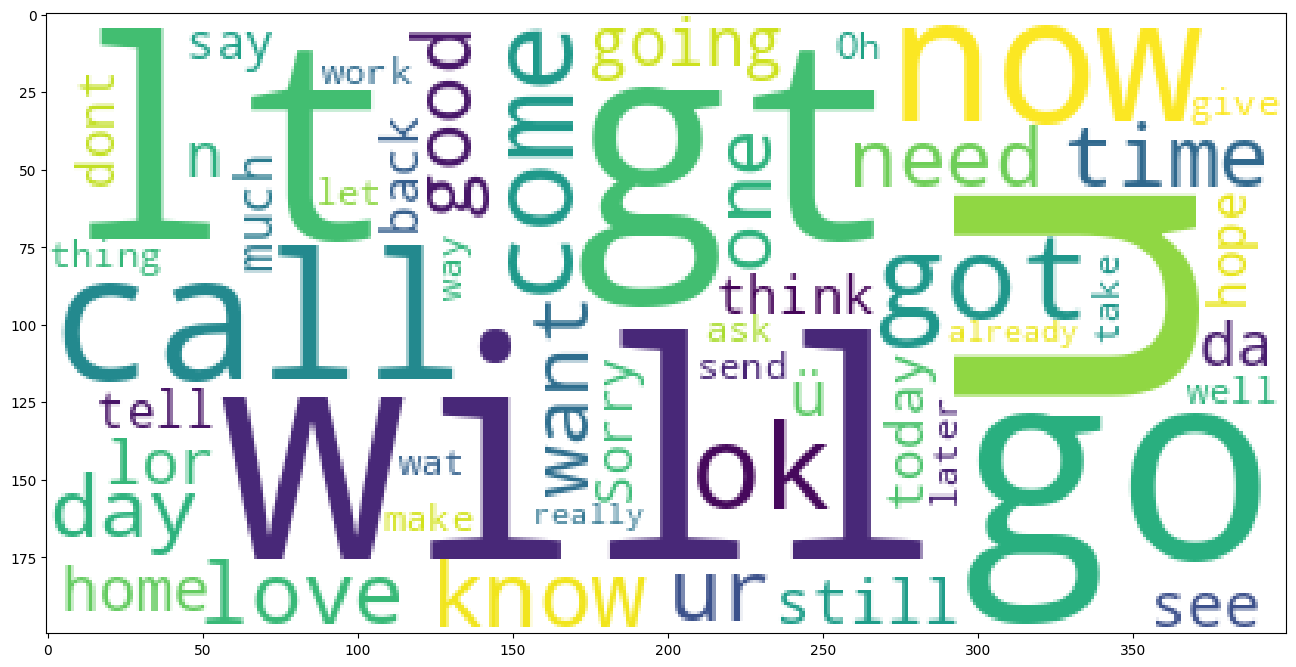

In [79]:
plt.figure(figsize=(16,9))
plt.imshow(wc_ham)

In [81]:
x.apply(clean_text)

0       [go, jurong, point, crazi, avail, bugi, n, gre...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, wkli, comp, win, fa, cup, final,...
3           [u, dun, say, earli, hor, u, c, alreadi, say]
4            [nah, think, goe, usf, live, around, though]
                              ...                        
5567    [time, tri, contact, u, pound, prize, claim, e...
5568                       [ü, b, go, esplanad, fr, home]
5569                                [piti, mood, suggest]
5570    [guy, bitch, act, like, interest, buy, someth,...
5571                                   [rofl, true, name]
Name: text, Length: 5572, dtype: object

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [83]:
tfidf = TfidfVectorizer(analyzer=clean_text)

In [84]:
x_vect = tfidf.fit_transform(x)

In [85]:
x_vect.shape

(5572, 5925)

In [86]:
# Cross Validation
from sklearn.model_selection import train_test_split

In [87]:
x_train, x_test, y_train, y_test = train_test_split(
    x_vect, y, random_state=0)

In [88]:
x_train.shape

(4179, 5925)

In [89]:
x_test.shape

(1393, 5925)

In [90]:
# Build the model 
from sklearn.svm import SVC

In [91]:
svm = SVC(kernel='linear')

In [92]:
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [93]:
y_pred = svm.predict(x_test)

In [95]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, y_pred)

0.9827709978463748

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.99      0.88      0.93       185

    accuracy                           0.98      1393
   macro avg       0.98      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [99]:
svm = SVC()
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
print(classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       1.00      0.86      0.92       185

    accuracy                           0.98      1393
   macro avg       0.99      0.93      0.96      1393
weighted avg       0.98      0.98      0.98      1393



0.9813352476669059

In [100]:
svm = SVC(kernel='poly')
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
print(classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1208
        spam       1.00      0.62      0.77       185

    accuracy                           0.95      1393
   macro avg       0.97      0.81      0.87      1393
weighted avg       0.95      0.95      0.94      1393



0.949748743718593

In [101]:
svm = SVC(kernel='sigmoid')
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
print(classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.98      0.87      0.92       185

    accuracy                           0.98      1393
   macro avg       0.98      0.93      0.95      1393
weighted avg       0.98      0.98      0.98      1393



0.9798994974874372

In [102]:
f = open('sample.csv')

In [103]:
new_next = f.readlines()

In [104]:
new_next

['Ok lar i double check wif da hair dresser already he said wun cut v short. He said will cut until i look nice.,,\n',
 'As a valued customer, I am pleased to advise you that following recent review of your Mob No. you are awarded with a £1500 Bonus Prize, call 09066364589\n',
 '"Today is ""song dedicated day.."" Which song will u dedicate for me? Send this to all ur valuable frnds but first rply me...",,\n']

In [105]:
svm.predict(tfidf.transform(new_next))

array(['ham', 'spam', 'ham'], dtype=object)